#### Download Humans or Horses Dataset Part 1 

---------------

In [2]:
# pip install tensorflow_datasets

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

In [4]:
dataset, info = tfds.load('horses_or_humans', with_info=True, as_supervised=True)

In [5]:
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_dir='C:\\Users\\USER\\tensorflow_datasets\\horses_or_humans\\3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",


In [6]:
class_names = info.features['label'].names
class_names

['horses', 'humans']

#### Download Humans or Horses Dataset Part 2

------------------

In [7]:
info.supervised_keys, info.splits

(('image', 'label'),
 {'train': <SplitInfo num_examples=1027, num_shards=2>,
  'test': <SplitInfo num_examples=256, num_shards=1>})

In [8]:
dataset

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [9]:
dataset['train']

<_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
for i, example in enumerate(dataset['train']):
    image, label = example
    save_dir = 'horse-or-human/train/{}'.format(class_names[label])
    os.makedirs(save_dir, exist_ok=True)
    filepath = save_dir + "/" + class_names[label] + "_" + str(i) + '.jpg'
    # print(i, label, save_dir)
    # print(filepath)

    # if i>5:
    #     break

    tf.keras.preprocessing.image.save_img(filepath, image.numpy())

In [11]:
image

<tf.Tensor: shape=(300, 300, 3), dtype=uint8, numpy=
array([[[192, 215, 233],
        [193, 215, 233],
        [193, 215, 234],
        ...,
        [244, 255, 255],
        [245, 255, 255],
        [245, 255, 255]],

       [[193, 215, 234],
        [193, 215, 234],
        [193, 215, 234],
        ...,
        [244, 255, 255],
        [245, 255, 255],
        [245, 255, 255]],

       [[193, 216, 234],
        [193, 216, 234],
        [193, 216, 234],
        ...,
        [244, 255, 255],
        [245, 255, 255],
        [244, 255, 255]],

       ...,

       [[ 64,  55,  51],
        [ 62,  53,  50],
        [ 54,  47,  44],
        ...,
        [ 36,  31,  30],
        [ 30,  26,  25],
        [ 30,  26,  24]],

       [[ 59,  50,  46],
        [ 58,  50,  46],
        [ 55,  49,  46],
        ...,
        [ 37,  33,  32],
        [ 29,  25,  24],
        [ 27,  23,  21]],

       [[ 56,  47,  43],
        [ 55,  47,  43],
        [ 52,  46,  43],
        ...,
        [ 48,  43,  4

In [12]:
for i, example in enumerate(dataset['test']):
    image, label = example
    save_dir = 'horse-or-human/test/{}'.format(class_names[label])
    os.makedirs(save_dir, exist_ok=True)
    filepath = save_dir + "/" + class_names[label] + "_" + str(i) + '.jpg'
    # print(i, label, save_dir)
    # print(filepath)

    # if i>5:
    #     break

    tf.keras.preprocessing.image.save_img(filepath, image.numpy())

#### Use of Image Data Generator

---------------------------------

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size=(300,300)
batch_size = 32

train_dir = "horse-or-human/train"
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = image_size, batch_size = batch_size, class_mode = "binary")

test_dir = "horse-or-human/test"
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size= image_size, batch_size= batch_size, class_mode="binary")


Found 1027 images belonging to 2 classes.


Found 256 images belonging to 2 classes.


#### Data Display in Subplots Matrix

------------------------

In [14]:
train_generator.class_indices, train_generator.class_mode, train_generator.classes

({'horses': 0, 'humans': 1}, 'binary', array([0, 0, 0, ..., 1, 1, 1]))

In [15]:
train_generator.filenames[:5], train_generator.samples

(['horses\\horses_0.jpg',
  'horses\\horses_1.jpg',
  'horses\\horses_1000.jpg',
  'horses\\horses_1004.jpg',
  'horses\\horses_1005.jpg'],
 1027)

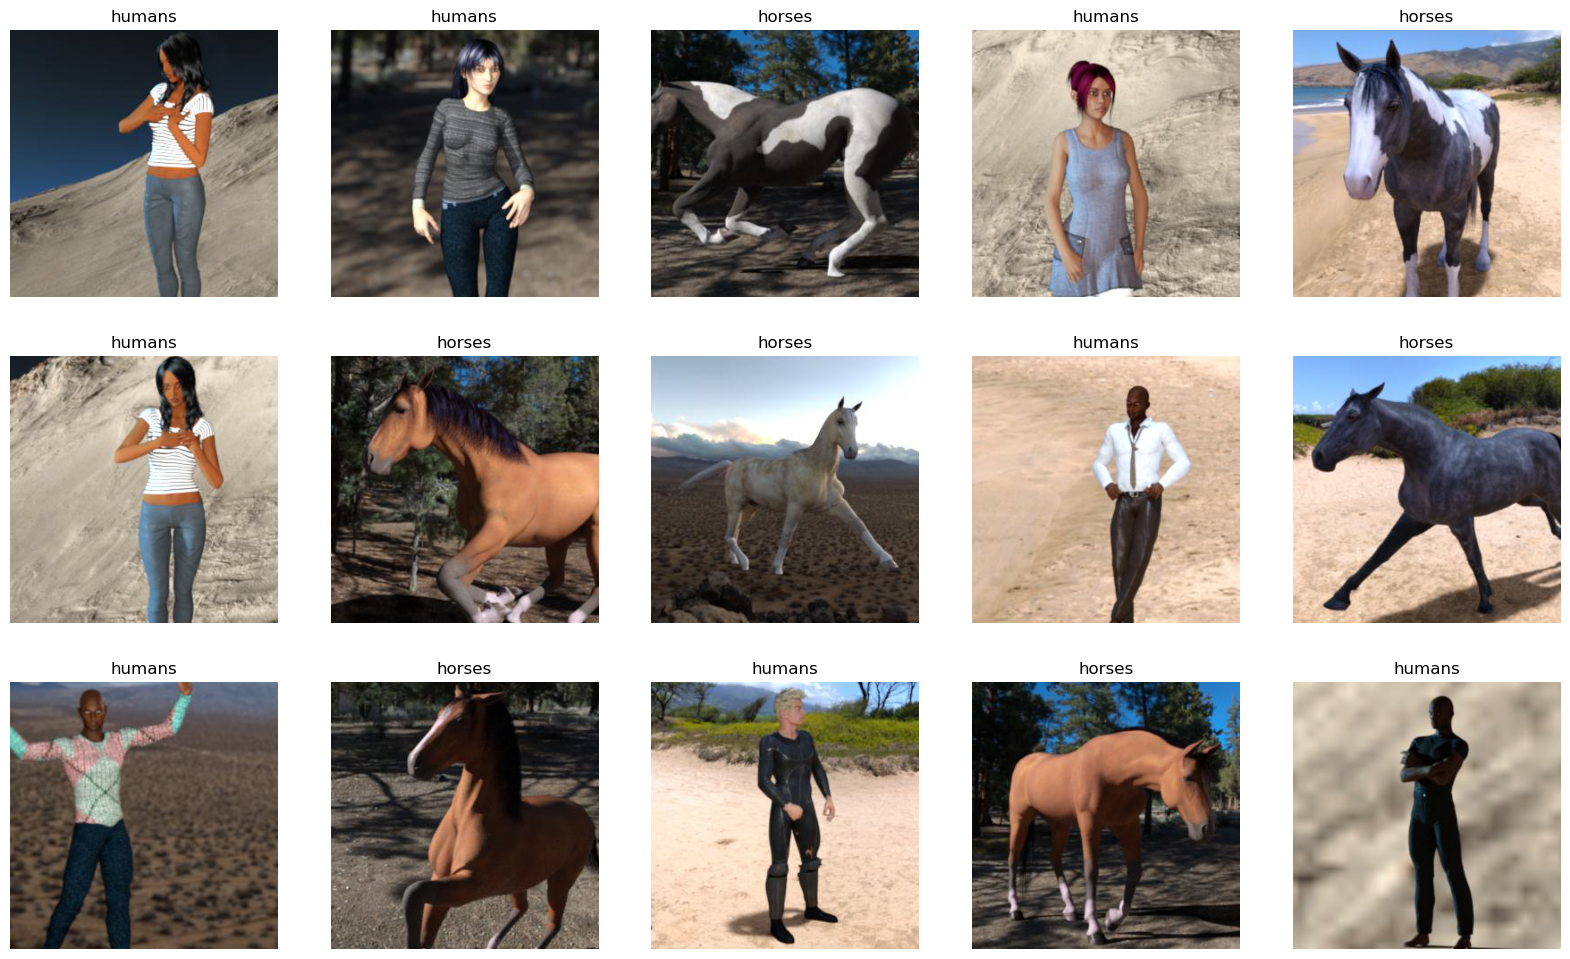

In [16]:
import matplotlib.pyplot as plt

nrows = 3
ncols = 5

train_path = 'horse-or-human/train'
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_batch = train_generator.next()
for i in range(0, nrows*ncols):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.axis('Off')
    plt.imshow(next_batch[0][i])
    class_idx = next_batch[1][i]
    plt.title(class_names[int(class_idx)])

plt.show()

#### Building CNN Model

---------------------

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import tensorflow as tf

In [18]:
def get_model():
    model = Sequential()

    # 1st Layer CNN
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(300,300,3)))
    model.add(MaxPooling2D(pool_size=(5,5)))

    # 2nd layer CNN
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(5,5)))

    # 3rd layer CNN
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=2))

    # 4th layer CNN
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))

    # add flatten layer
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    return model

In [19]:
model = get_model()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 512)         1180160   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 512)         0

In [21]:
# size of output layer for conv layer
# total param for conv layer
# output size after maxpool layer
# total param for dense layer

In [22]:
# size of output layer for conv layer (300,300,3) -> (None, 298,298, 128)
# input_size-(filter_size-1)
300 - (3-1), 300-(3-1),128 # no. of kernels/filters 

(298, 298, 128)

In [23]:
# total param for conv layer
# (n*k*K+1)*f -> (# channel in prev layer * filt_size*filt_size + 1 (bias term) *# filter in current layer)
(3*3*3+1)*128

3584

In [24]:
#  (None, 57, 57, 256) -2nd layer of CNN
(128*3*3+1)*256 , (256*3*3+1)*512, (512*3*3+1)*512


(295168, 1180160, 2359808)

#### CNN Parameter Calculation Part 3

---------------------------------

In [25]:
# total param for dense layer (n+1)*m n=number of inputs, m=number of cells
(2048+1)*512, (512+1)*1

(1049088, 513)

In [26]:
# output size after maxpool layer | floor((w-f)/s+1), floor -> 19.9 => 10, 10.1 => 10
# 298, 298 -> 59, 59
np.floor((298-5)/5+1)

59.0

##### Model Training

-------------------------------------

In [27]:
model.layers

In [28]:
model.layers[0].get_weights()

[array([[[[ 0.0114966 , -0.05460525, -0.05901013, ...,  0.00709379,
            0.07014358,  0.02352504],
          [ 0.03706344,  0.05565396, -0.06050966, ..., -0.06915188,
            0.04581752, -0.01747302],
          [ 0.01293026, -0.03219157,  0.03543963, ...,  0.06643625,
            0.03394215, -0.06292377]],
 
         [[ 0.00351869, -0.03460116, -0.037214  , ..., -0.01500783,
           -0.01726707, -0.00715809],
          [-0.04800998,  0.0378049 , -0.01832236, ...,  0.02171371,
            0.01636907,  0.06667152],
          [-0.06599675,  0.00426306, -0.01890083, ..., -0.0239787 ,
            0.06943648,  0.06400749]],
 
         [[ 0.04978365,  0.03565823,  0.01777114, ...,  0.05300011,
           -0.04206151, -0.0371184 ],
          [ 0.00703128, -0.04637412, -0.03491194, ...,  0.01233619,
            0.0464861 ,  0.031505  ],
          [-0.04814253, -0.01345741, -0.00650369, ..., -0.03141566,
            0.07124993, -0.021767  ]]],
 
 
        [[[ 0.03841447,  0.0568368

In [29]:
weights, biases = model.layers[0].get_weights()

In [30]:
len(biases), len(weights[0][0])

(128, 3)

In [31]:
len(biases), len(weights[0][0][0])

(128, 128)

In [32]:
# 2nd layer -- pooling layer
model.layers[1].get_weights()

[]

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=4, validation_data= test_generator)

Epoch 1/4



33/33 [==============================] - 240s 7s/step - loss: 0.6293 - accuracy: 0.6329 - val_loss: 0.4868 - val_accuracy: 0.8359
Epoch 2/4
33/33 [==============================] - 222s 7s/step - loss: 0.1997 - accuracy: 0.9211 - val_loss: 0.4374 - val_accuracy: 0.8867
Epoch 3/4
33/33 [==============================] - 222s 7s/step - loss: 0.0820 - accuracy: 0.9737 - val_loss: 1.2208 - val_accuracy: 0.8359
Epoch 4/4
33/33 [==============================] - 183s 6s/step - loss: 0.0944 - accuracy: 0.9659 - val_loss: 0.9724 - val_accuracy: 0.8398


In [34]:
history.history

{'loss': [0.6293027997016907,
  0.19967146217823029,
  0.08203475177288055,
  0.09435634315013885],
 'accuracy': [0.6329113841056824,
  0.9211295247077942,
  0.9737098217010498,
  0.9659201502799988],
 'val_loss': [0.4867722988128662,
  0.43744930624961853,
  1.2208058834075928,
  0.9723528623580933],
 'val_accuracy': [0.8359375, 0.88671875, 0.8359375, 0.83984375]}